In [1]:
import os
import re
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import random

import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

## Extract image data from .tgz file

In [2]:
# import tarfile

# Access .tgz folder
# file = tarfile.open('EnglishImg.tgz')

# extract .tgz folder to 'data' folder
# file.extractall('./data')
  
# file.close()

## Import Data

In [3]:
folder_path = r'data\English\Img\GoodImg\Bmp'
data_dir = os.listdir(folder_path)
IMG_SIZE = 28

In [4]:
# New list to store array values along with corresponding digit labels
data = []

# Itterate through data directory to access folders which contain iamges of digits
for sample in data_dir:
    
    sample_dir_path = folder_path + '/' + sample
    sample_dir = os.listdir(sample_dir_path)

    # Retrieve image digit label
    for img in sample_dir:
        current_char = re.findall('img\d+', img)[0]        
        text = current_char.replace('img', '')
        dig = int(text)
        current_dig = dig - 1
        
        if current_dig > 9:
            break
        
        image_dir = sample_dir_path + '/' + img
        
        # Convert grayscaled image to an array using cv2 package
        img_array = cv2.imread(os.path.join(image_dir), cv2.IMREAD_GRAYSCALE)
        
        # Resize all images to the standard IMG_SIZE which was set to 28 * 28 for the purpose of this analysis
        new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
        
        # Append arrays and labels to data list
        data.append([new_array, current_dig])

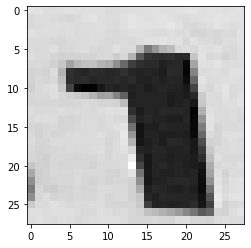

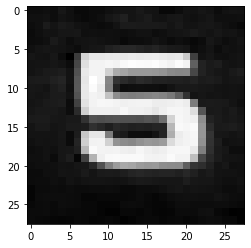

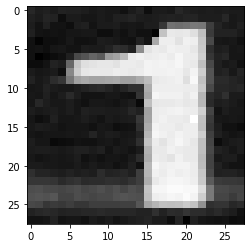

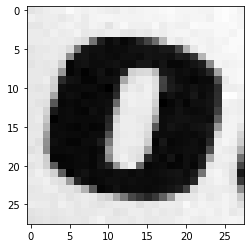

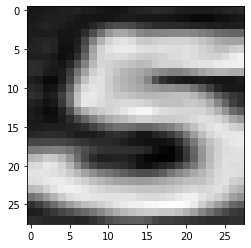

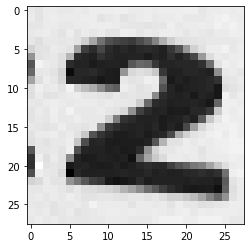

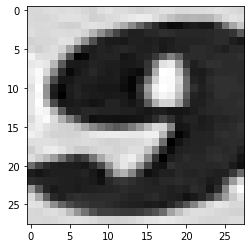

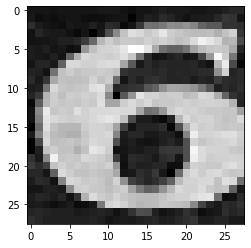

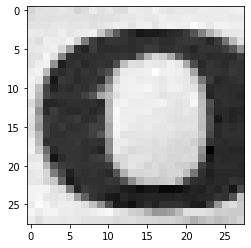

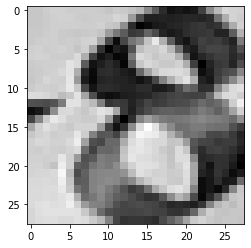

In [5]:
# Visulaize 10 random images from dataset 
for image in random.sample(data, 10):
    plt.imshow(image[0], cmap='gray')
    plt.show()

## Creating Train Test Splits

In [6]:
print('Length of Original Dataset:', len(data))

# Remove 10 random images for manual testing at the end
random.shuffle(data)
manual_test = data[:10]
data = data[10:]

print('Length of Manual Test Dataset:', len(manual_test))
print('Length of New Dataset:', len(data))

Length of Original Dataset: 593
Length of Manual Test Dataset: 10
Length of New Dataset: 583


In [7]:
# Retrieve Features and Labels from data list
X = []
y = []

for features, label in data:
    X.append(features)
    y.append(label)

# Convert Labels and Features to arrays
X = np.array(X)
y = np.array(y)

In [8]:
# Split data in to train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)

# Import suplementary data from keras mnist dataset which has 60,000 instances
((mnist_train_X, mnist_train_y), (mnist_test_X, mnist_test_y)) = mnist.load_data()

In [9]:
print('Length of X_train:', X_train.shape[0])
print('Length of y_train:', y_train.shape[0])
print('Length of X_test:', X_test.shape[0])
print('Length of y_test:', y_test.shape[0])
print('---------------------------------------------')
print('Length of mnist_train_X:', mnist_train_X.shape[0])
print('Length of mnist_train_y:', mnist_train_y.shape[0])
print('Length of mnist_test_X:', mnist_test_X.shape[0])
print('Length of mnist_test_X:', mnist_test_y.shape[0])

Length of X_train: 466
Length of y_train: 466
Length of X_test: 117
Length of y_test: 117
---------------------------------------------
Length of mnist_train_X: 60000
Length of mnist_train_y: 60000
Length of mnist_test_X: 10000
Length of mnist_test_X: 10000


In [10]:
# Combine both datasets
X_train = np.append(X_train, mnist_train_X, axis=0)
X_test = np.append(X_test, mnist_test_X, axis=0)

y_train = np.append(y_train, mnist_train_y, axis=0)
y_test = np.append(y_test, mnist_test_y, axis=0)

In [11]:
print('Length of X_train:', X_train.shape[0])
print('Length of y_train:', y_train.shape[0])
print('Length of X_test:', X_test.shape[0])
print('Length of y_test:', y_test.shape[0])

Length of X_train: 60466
Length of y_train: 60466
Length of X_test: 10117
Length of y_test: 10117


## Data Preprocessing

In [12]:
# Scale the data by dividing by max value, in this case 255
X_train = X_train / 255
X_test = X_test / 255

In [13]:
def flatten(data, size):
    '''
    Function to flatten arrays for input to neural network
    '''
    flattened_data = data.reshape(len(data), size*size)
    
    return flattened_data

In [14]:
# Flatten arrays
X_train_flattened = flatten(X_train, IMG_SIZE)
X_test_flattened = flatten(X_test, IMG_SIZE)

## Modelling

In [15]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(IMG_SIZE*IMG_SIZE,), activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']
)

In [16]:
model.fit(X_train_flattened, 
              y_train,
              epochs=25,
              batch_size = 200
         )

Epoch 1/25
303/303 [==============================] - 1s 1ms/step - loss: 0.4672 - accuracy: 0.8723
Epoch 2/25
303/303 [==============================] - 0s 1ms/step - loss: 0.2232 - accuracy: 0.9360
Epoch 3/25
303/303 [==============================] - 0s 1ms/step - loss: 0.1699 - accuracy: 0.9511
Epoch 4/25
303/303 [==============================] - 0s 1ms/step - loss: 0.1387 - accuracy: 0.9597
Epoch 5/25
303/303 [==============================] - 0s 1ms/step - loss: 0.1162 - accuracy: 0.9661
Epoch 6/25
303/303 [==============================] - 0s 1ms/step - loss: 0.1002 - accuracy: 0.9703
Epoch 7/25
303/303 [==============================] - 0s 1ms/step - loss: 0.0874 - accuracy: 0.9740
Epoch 8/25
303/303 [==============================] - 0s 1ms/step - loss: 0.0767 - accuracy: 0.9773
Epoch 9/25
303/303 [==============================] - 0s 1ms/step - loss: 0.0690 - accuracy: 0.9800
Epoch 10/25
303/303 [==============================] - 0s 1ms/step - loss: 0.0612 - accuracy: 0.9820

## Evaluation

Text(69.0, 0.5, 'Truth')

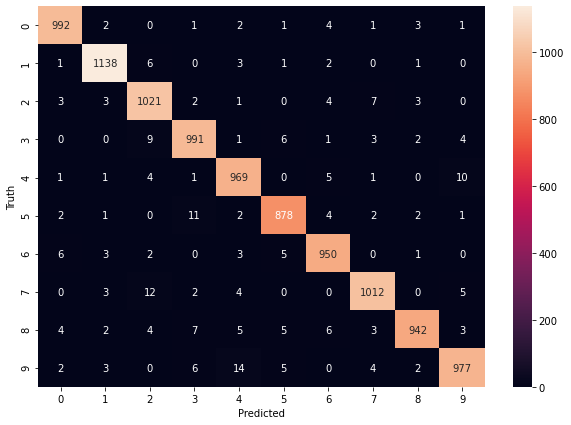

In [17]:
# Create Confusion Matrix to visualise perfformance of model on test set
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]

cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Manual Evaluation

In [18]:
# Complete same preprocessing steps on manual test data

X = []
y = []
for feature, label in manual_test:
    X.append(feature)
    y.append(label)
    
X = np.array(X)
y = np.array(y)

X = X / 255

X_flattened = flatten(X, IMG_SIZE)
y_pred = model.predict(X_flattened)

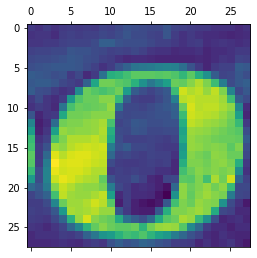

This image probably contains the number 0


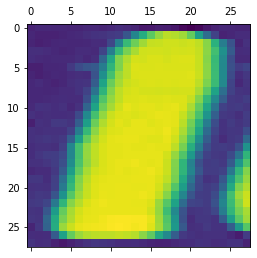

This image probably contains the number 1


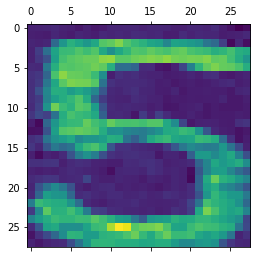

This image probably contains the number 5


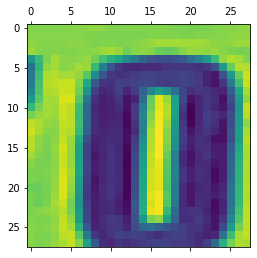

This image probably contains the number 0


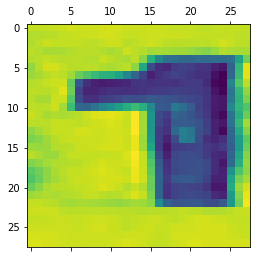

This image probably contains the number 1


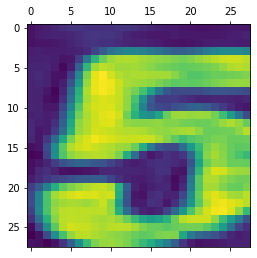

This image probably contains the number 5


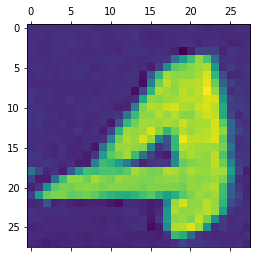

This image probably contains the number 1


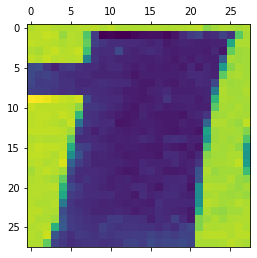

This image probably contains the number 2


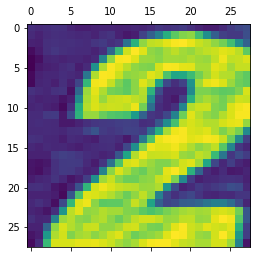

This image probably contains the number 1


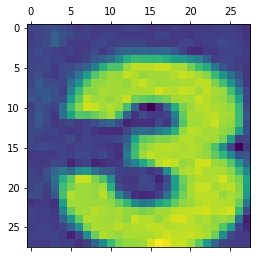

This image probably contains the number 3


In [19]:
# Make Prediction for each image in manual test set
for image in range(0,10):
    plt.matshow(X[image])
    plt.show()
    
    print(f'This image probably contains the number {np.argmax(y_pred[image])}')